In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from seis2GR import seis2GR

# Applied Seismology (GEOS 626) - University of Alaska Fairbanks
# Python adaptation of the Gutenberg-Richter frequency-magnitude relationship HW by Carl Tape
# Explores the relationship between cumulative and regular distributions using the GCMT catalog as an example.
# See Pacheco, Scholz, Sykes (1992 Nature) for details on the two segments of the GCMT distribution

# Calls seis2GR.py

# Run this cell at the beginning of each session

dict_keys(['__header__', '__version__', '__globals__', 'otime', 'lat', 'lon', 'dep', 'M', 'M0', 'Mw', 'eid'])
GCMT catalog duration is 35.495 years


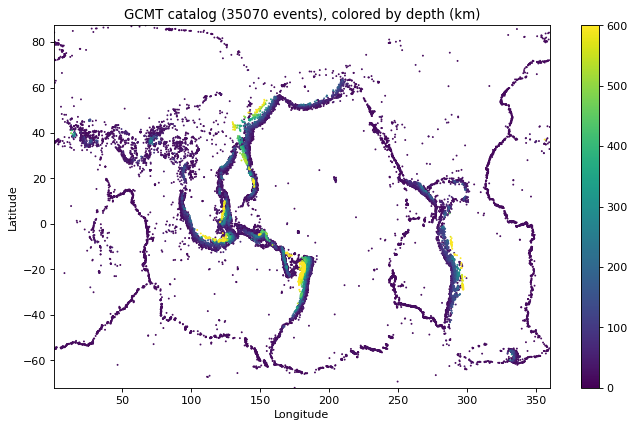

In [2]:
# Problem 1-1

# Load GCMT catalog - Note: currently just loads Matlab database, may want to change later
# M: 6 x n set of moment tensors
# M0: 1 x n set of scalar seismic moments (derived from moment tensors)
# Mw: n x 1 set of moment magnitudes (derived from moment tensors)
# dep: n x 1 set of depths
# eid: n x 1 set of event IDs
# lat: n x 1 set of latitudes
# lon: n x 1 set of longitudes
# otime: n x 1 set of origin times, in seconds (relative to Matlab t=0) Note: This may be weird in python

data = scipy.io.loadmat('./data/cmtall_sub.mat') # Make sure that cmtall_sub.mat is in your working directory 
print(data.keys()) # This allows you to see what variables are in your dictionary

Mw = data['Mw']
dep = data['dep']
lat = data['lat']
lon = data['lon']
otime = data['otime']
# To see the shape of any variable -> Mw.shape

tran_yr = (max(otime) - min(otime)) / 365.25 #tran_yr = "time range in years"
tran_yr = np.round(tran_yr, decimals = 3)

# To see what variables and modules at any time -> %whos
print('GCMT catalog duration is %.3f years' %tran_yr)

# Plot the catalog, colored by depth
isort = np.argsort(dep, axis=0)

lon[lon<0] = lon[lon<0] + 360 # center map on 180 deg
title = 'GCMT catalog (' + str(len(dep)) + ' events), colored by depth (km)'

plt.figure(figsize=(10,6),dpi=80)
plt.scatter(lon[isort],lat[isort],s=0.5,c=dep[isort],cmap='viridis',vmin=0,vmax=600)
plt.xlim(min(lon),max(lon))
plt.ylim(min(lat),max(lat))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(title)
plt.colorbar()
plt.show()

In [3]:
print("Range of depth is from {} km until {} km".format(dep.min(), dep.max()))

Range of depth is from 10.0 km until 699.3 km


The deepest earthquakes occur at the Japan Trench, the Peru-Chile Trench and the Java Subduction Zone.

In [4]:
print("Range of (moment) magnitudes is from {:.2f} until {:.2f}".format(Mw.min(), Mw.max()))

Range of (moment) magnitudes is from 4.29 until 9.08


In [5]:
# Problem 1-2

dmag = 0.1 # Magnitude bin width

# Note: seis2GR is a homebrewed function. You must have it in your working directory
# Note: Python is 0-indexed, i.e. 'bin 0' is the first bin in the array

N, Ninc, Medges = seis2GR(Mw,0.1)

seis2GR: 35070 events, min M = 4.295, max M = 9.083
bin  0 : Mw = [ 4.2   4.3 ] Ninc =  1 N =  35070
bin  1 : Mw = [ 4.3   4.4 ] Ninc =  0 N =  35069
bin  2 : Mw = [ 4.4   4.5 ] Ninc =  0 N =  35069
bin  3 : Mw = [ 4.5   4.6 ] Ninc =  7 N =  35069
bin  4 : Mw = [ 4.6   4.7 ] Ninc =  62 N =  35062
bin  5 : Mw = [ 4.7   4.8 ] Ninc =  366 N =  35000
bin  6 : Mw = [ 4.8   4.9 ] Ninc =  1060 N =  34634
bin  7 : Mw = [ 4.9   5.0 ] Ninc =  2303 N =  33574
bin  8 : Mw = [ 5.0   5.1 ] Ninc =  3283 N =  31271
bin  9 : Mw = [ 5.1   5.2 ] Ninc =  4017 N =  27988
bin  10 : Mw = [ 5.2   5.3 ] Ninc =  4126 N =  23971
bin  11 : Mw = [ 5.3   5.4 ] Ninc =  3790 N =  19845
bin  12 : Mw = [ 5.4   5.5 ] Ninc =  3191 N =  16055
bin  13 : Mw = [ 5.5   5.6 ] Ninc =  2515 N =  12864
bin  14 : Mw = [ 5.6   5.7 ] Ninc =  2012 N =  10349
bin  15 : Mw = [ 5.7   5.8 ] Ninc =  1650 N =  8337
bin  16 : Mw = [ 5.8   5.9 ] Ninc =  1389 N =  6687
bin  17 : Mw = [ 5.9   6.0 ] Ninc =  1104 N =  5298
bin  18 : Mw = [ 6.0  

In [6]:
print("Maximum value of incremental distribution Ninc = {}".format(Ninc.max()))

print("Maximum value of cumulative distribution N = {}".format(N.max()))

print("Minumum value of incremental distribution Ninc = {}".format(Ninc.min()))

print("Minimum value of cumulative distribution N = {}".format(N.min()))

Maximum value of incremental distribution Ninc = 4126
Maximum value of cumulative distribution N = 35070
Minumum value of incremental distribution Ninc = 0
Minimum value of cumulative distribution N = 0


In [7]:
print(Medges)

print("{}, {}, {}".format(Medges.shape, N.shape, Ninc.shape))

[4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7
 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2]
(51,), (50,), (50,)


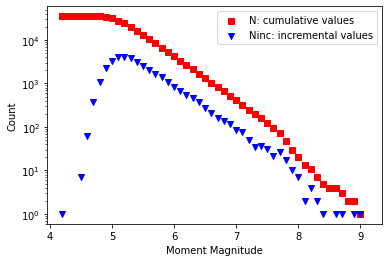

In [13]:
# Problem 1-3
# Start your work here
# 1-3 a
plt.figure()
plt.scatter(Medges[:-1], N, label='N: cumulative values', color='r', marker='s')
plt.scatter(Medges[:-1], Ninc, label='Ninc: incremental values', color='b', marker='v')
plt.yscale("log")
plt.xlabel('Moment Magnitude')
plt.ylabel('Count')
plt.legend()
plt.show()

[6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1]
b value = 1.018 and the intercept is at Mw 9.741


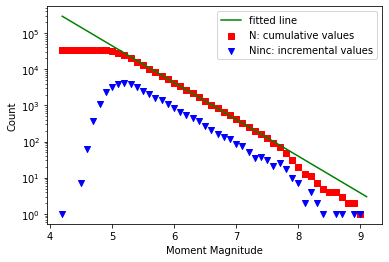

In [93]:
# 1-3 b Slope
# check inbetween mag 5 and 7.5
from scipy.stats import linregress
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

print(Medges[20:30])
res = linregress(Medges[20:30], np.log10(N[20:30]))
print("b value = {:.3f} and the intercept is at Mw {:.3f}".format(-res.slope, res.intercept))

Nlin = (res.intercept + res.slope*Medges[:-1])

# Don't forget to take the y values to the power of 10
plt.plot(Medges[:-1], 10**Nlin, 'g', label='fitted line')

plt.scatter(Medges[:-1], N, label='N: cumulative values', color='r', marker='s')
plt.scatter(Medges[:-1], Ninc, label='Ninc: incremental values', color='b', marker='v')
plt.yscale("log")
plt.xlabel('Moment Magnitude')
plt.ylabel('Count')
plt.legend()
plt.show()

In [94]:
# 1-3 c Largest expected earthquake
n = 1
Mmax = (n - res.intercept)/ res.slope
print(Mmax)

8.585627707381096


In [ ]:
# 1-3 d Catalog completeness

# Compare with figure above:
# Mc ~ 5.1

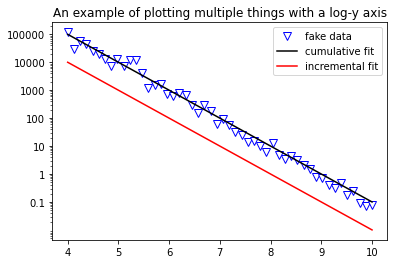

In [30]:
# Example of plotting multiple items on log-scaled axes
# 1) Generate fake data and best-fitting line
# 2) Plot lines

n = 50
x = np.linspace(4,10,num=n)
b = 1
a = 9
e = 0.1
err = e*(-1+2*np.random.randn(n))
Nd = 10**(a-b*x + err)
N  = 10**(a-b*x)
N2  = 10**(a-1-b*x)

plt.semilogy(x,Nd,color='blue',marker='v',linestyle='none',ms=8,mfc='white',label='fake data') # points
# After this, you do not need to specify semilogy
plt.plot(x,N,color='k',label='cumulative fit') # a line
plt.plot(x,N2,'r',label='incremental fit') # a different line
plt.legend(loc='upper right')
plt.title('An example of plotting multiple things with a log-y axis')
plt.xticks([4, 5, 6, 7, 8, 9, 10])
plt.yticks(10.0**np.arange(-1,6),['0.1','1','10','100','1000','10000','100000']) #numpy.arange does include the 'stop' value

plt.show()

In [ ]:
# 1-4 a
